In [ ]:
#Compute Anomaly maps
import xarray as xr
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
# Load freezing days data
nc_files = sorted(glob.glob('/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Isotherme0_data/freezing_days_per_year*.nc'))
ds = xr.open_mfdataset(nc_files, decode_times=False).load()

# Define periods for anomaly calculation
periods = {
    "2020-2040": (2020, 2040),
    "2041-2060": (2041, 2060),
    "2061-2080": (2061, 2080),
    "2081-2100": (2081, 2100),
}
# Use 1990-2020 as the reference (early) period for anomalies
ref_period = ds.freezing_days.sel(year=slice(1990, 2020))
mean_ref = ref_period.mean(dim="year")

# Compute anomaly maps for each period
anomaly_maps = {}
for label, (start, end) in periods.items():
    period = ds.freezing_days.sel(year=slice(start, end))
    mean_period = period.mean(dim="year")
    anomaly_maps[label] = mean_period - mean_ref

# Export anomaly maps as NetCDF files
output_dir = "/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Isotherme0_data/anomaly_maps"
os.makedirs(output_dir, exist_ok=True)
for label, anomaly in anomaly_maps.items():
    output_path = os.path.join(output_dir, f'freezing_days_anomaly_{label.replace("-", "_")}.nc')
    # Save each anomaly map as a single-variable DataArray in a NetCDF file
    anomaly.to_netcdf(output_path)


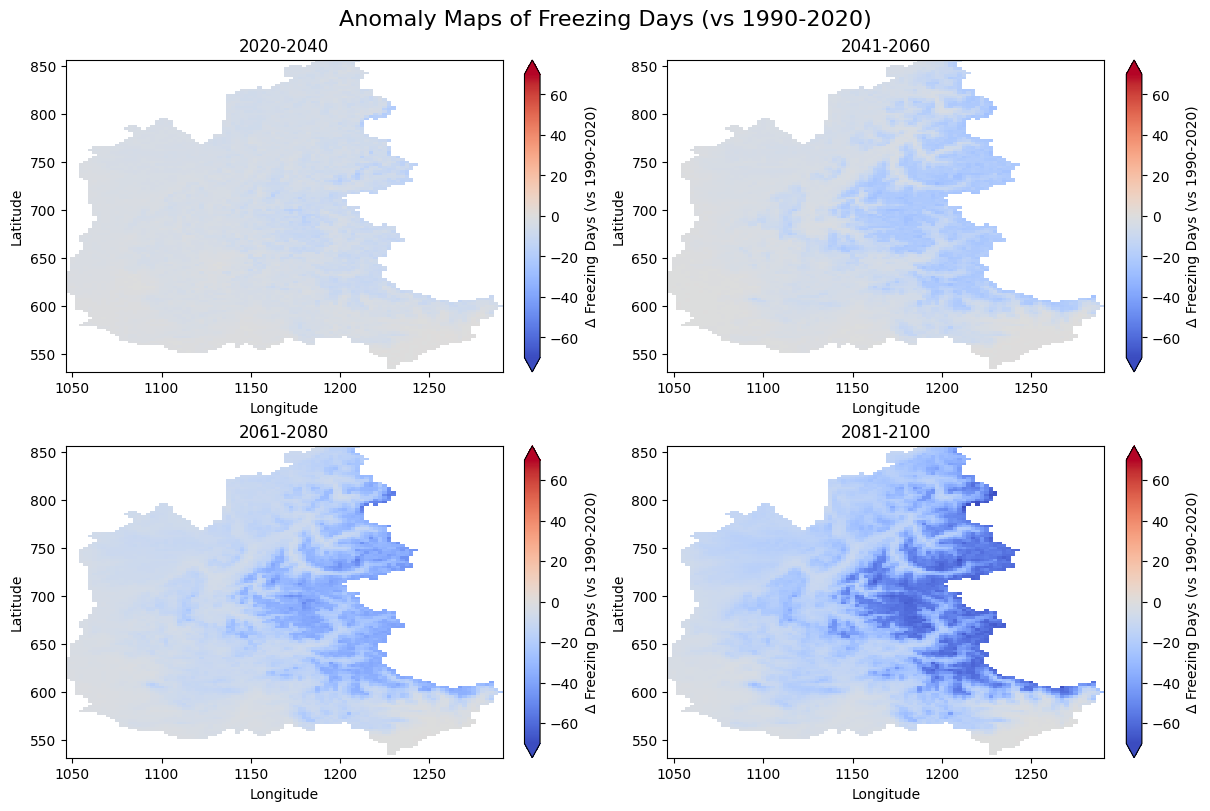

In [8]:

#Plot the anomaly maps (test)
import matplotlib.pyplot as plt

# Define anomaly map file paths and labels
anomaly_labels = [
    "2020-2040", 
    "2041-2060", 
    "2061-2080", 
    "2081-2100"
]
anomaly_files = [
    f"/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Isotherme0_data/anomaly_maps/freezing_days_anomaly_{label.replace('-', '_')}.nc"
    for label in anomaly_labels
]

# Load the anomaly maps into a list
anomaly_maps = [xr.open_dataarray(filepath) for filepath in anomaly_files]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
for idx, (label, anomaly, ax) in enumerate(zip(anomaly_labels, anomaly_maps, axs.flatten())):
    im = anomaly.plot(
        ax=ax,
        cmap='coolwarm',
        vmin=-70,
        vmax=70,
        cbar_kwargs={
            'label': 'Δ Freezing Days (vs 1990-2020)',
            'extend': 'both'
        }
    )
    ax.set_title(f"{label}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
plt.suptitle("Anomaly Maps of Freezing Days (vs 1990-2020)", fontsize=16)
plt.show()


In [12]:
# Load tropical days data
nc_files = sorted(glob.glob('/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Tropical_data/tropical_days_per_year*.nc'))
ds = xr.open_mfdataset(nc_files, decode_times=False).load()

# Define periods for anomaly calculation
periods = {
    "2020-2040": (2020, 2040),
    "2041-2060": (2041, 2060),
    "2061-2080": (2061, 2080),
    "2081-2100": (2081, 2100),
}
# Use 1990-2020 as the reference (early) period for anomalies
ref_period = ds.tropical_days.sel(year=slice(1990, 2020))
mean_ref = ref_period.mean(dim="year")

# Compute anomaly maps for each period
anomaly_maps = {}
for label, (start, end) in periods.items():
    period = ds.tropical_days.sel(year=slice(start, end))
    mean_period = period.mean(dim="year")
    anomaly_maps[label] = mean_period - mean_ref

# Export anomaly maps as NetCDF files
output_dir = "/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Tropical_data/anomaly_maps"
os.makedirs(output_dir, exist_ok=True)
for label, anomaly in anomaly_maps.items():
    output_path = os.path.join(output_dir, f'tropical_days_anomaly_{label.replace("-", "_")}.nc')
    # Save each anomaly map as a single-variable DataArray in a NetCDF file
    anomaly.to_netcdf(output_path)


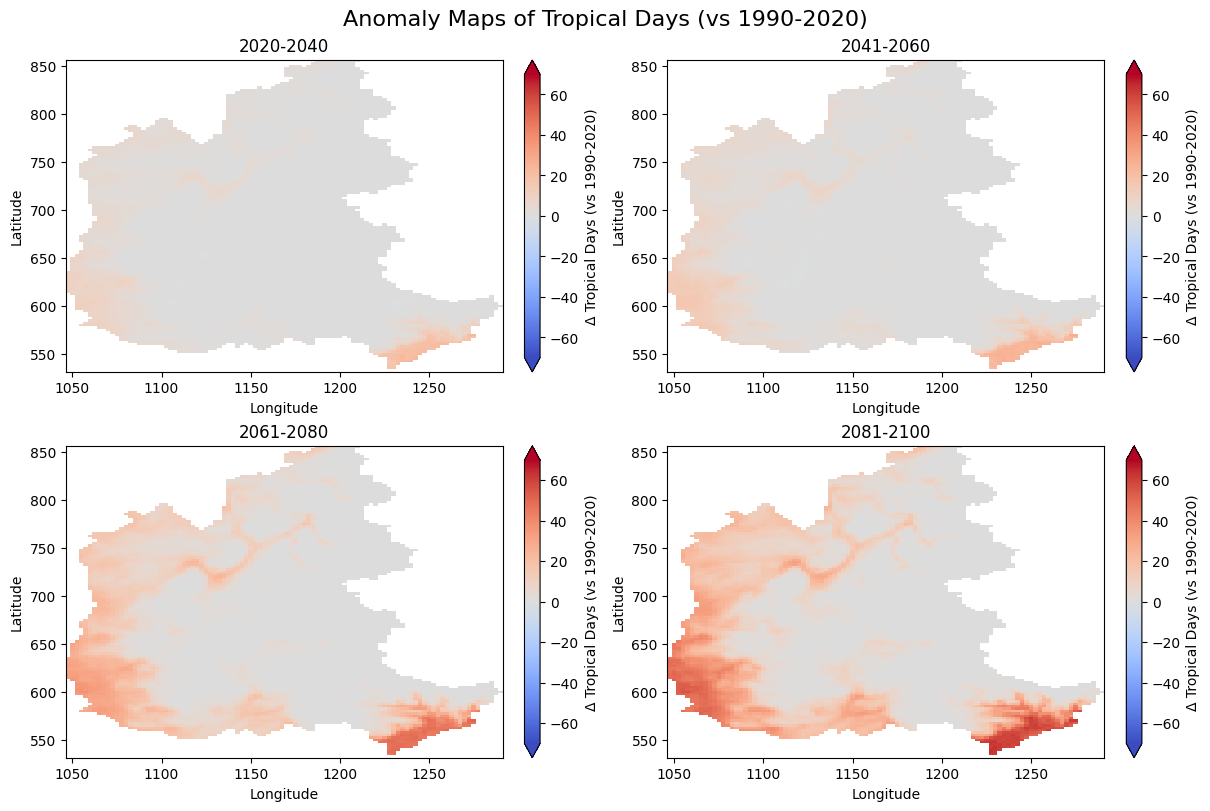

In [13]:
#Plot the anomaly maps for tropical days (test)
import matplotlib.pyplot as plt

# Define anomaly map file paths and labels for tropical days
tropical_anomaly_labels = [
    "2020-2040", 
    "2041-2060", 
    "2061-2080", 
    "2081-2100"
]
tropical_anomaly_files = [
    f"/Users/epauthen/Documents/GitHub/Hackathon-Meteo-France/Tropical_data/anomaly_maps/tropical_days_anomaly_{label.replace('-', '_')}.nc"
    for label in tropical_anomaly_labels
]

# Load the anomaly maps into a list
tropical_anomaly_maps = [xr.open_dataarray(filepath) for filepath in tropical_anomaly_files]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
for idx, (label, anomaly, ax) in enumerate(zip(tropical_anomaly_labels, tropical_anomaly_maps, axs.flatten())):
    im = anomaly.plot(
        ax=ax,
        cmap='coolwarm',
        vmin=-70,
        vmax=70,
        cbar_kwargs={
            'label': 'Δ Tropical Days (vs 1990-2020)',
            'extend': 'both'
        }
    )
    ax.set_title(f"{label}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
plt.suptitle("Anomaly Maps of Tropical Days (vs 1990-2020)", fontsize=16)
plt.show()
